In [2]:
import uproot
file = uproot.open('/Users/albaburgosmondejar/Desktop/Input/hhml_v2_2lSC_QMisID_data.root')
import matplotlib.pyplot as plt

file.keys()
file.classnames()
tree = file['qmisid_cr']
tree.arrays()
branches = tree.arrays()

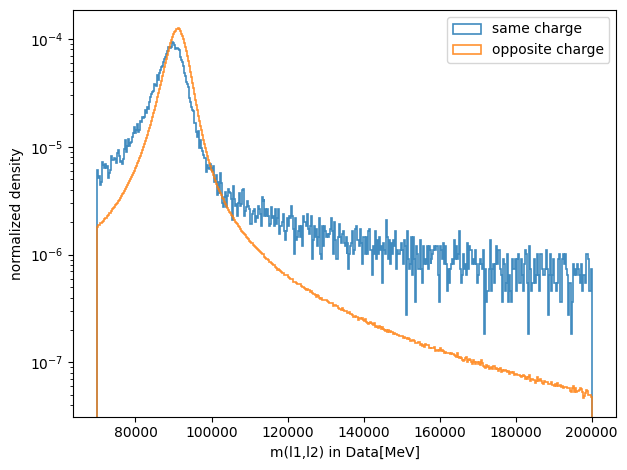

In [4]:
#Failure Mode Investigation
mask1 = branches["same_charge"] == 1
mask0 = branches["same_charge"] == 0

plt.figure()

plt.hist(
    branches["m_l1l2"][mask1],
    bins=500,
    range=(7e4,2e5),
    histtype="step",
    linewidth=1.2,
    alpha=0.85,
    density=True,
    label="same charge"
)

plt.hist(
    branches["m_l1l2"][mask0],
    bins=500,
    range=(7e4,2e5),
    histtype="step",
    linewidth=1.2,
    alpha=0.85,
    density=True,
    label="opposite charge"
)

plt.xlabel("m(l1,l2) in Data[MeV]")
plt.ylabel("normalized density")
plt.yscale("log")
plt.legend()
plt.tight_layout()
plt.show()

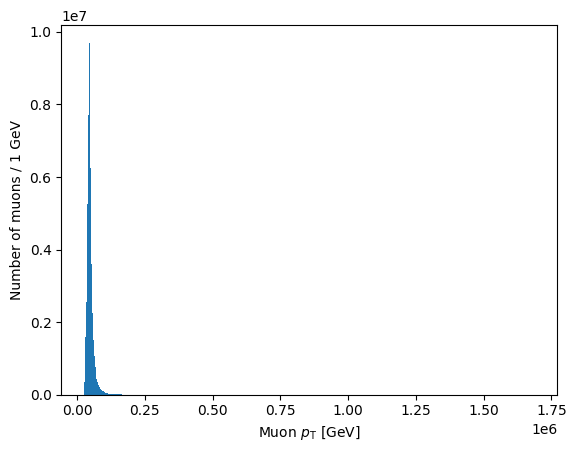

In [ ]:
import awkward as ak
import matplotlib.pyplot as plt
plt.hist((branches["l1_pt"]), bins=500,range(0, 0.25*1e6))
plt.xlabel('Muon $p_{\mathrm{T}}$ [GeV]')
plt.ylabel('Number of muons / 1 GeV')
plt.show()
plt.show()

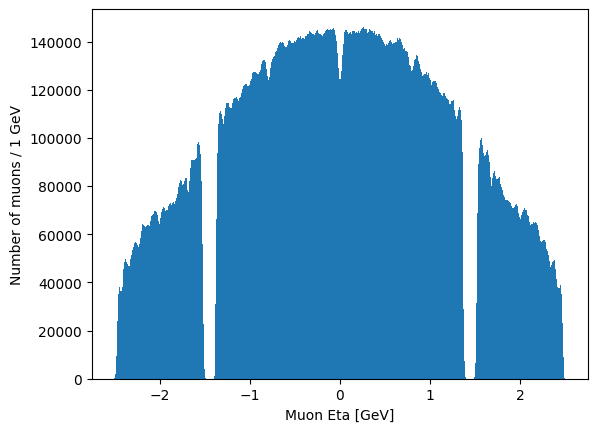

In [8]:
import awkward as ak
import matplotlib.pyplot as plt
plt.hist((branches["l1_eta"]), bins=500)
plt.xlabel('Muon Eta [GeV]')
plt.ylabel('Number of muons / 1 GeV')
plt.show()
plt.show()

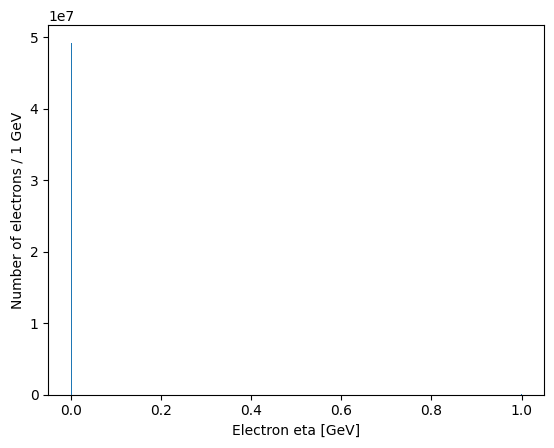

In [23]:
import awkward as ak
import matplotlib.pyplot as plt
plt.hist((branches["same_charge"]), bins=500)
plt.xlabel('Electron eta [GeV]')
plt.ylabel('Number of electrons / 1 GeV')
plt.show()
plt.show()


In [31]:
print(len(branches["l1_isQMisID"]>0))
print(len(branches["l2_isQMisID"]>0))
print(len(branches["same_charge"]))

mask = branches["l1_isQMisID"]>0

print(branches["l1_isQMisID"]>0)
#print(branches["l2_isQMisID"][55],branches["l2_IFF"][55])
import numpy as np
vals, counts = np.unique(branches["same_charge"], return_counts=True)
print(vals, counts)

49242455
49242455
49242455
[False, False, False, False, False, ..., False, False, False, False, False]
[0, 1] [49194229, 48226]


In [5]:
import numpy as np
vals, counts = np.unique(branches["l1_isQMisID"], return_counts=True)
print(vals, counts)

l1_mask = np.array(branches["l1_isQMisID"]) > 0
l2_mask = np.array(branches["l2_isQMisID"]) > 0

print("l1 QMisID count:", np.sum(l1_mask))
print("l2 QMisID count:", np.sum(l2_mask))
print("total QmisID:", np.sum(l1_mask)+np.sum(l2_mask))
print("same charge total:", np.sum(branches["same_charge"]))
print("opposite charge total:", np.sum(branches["opposite_charge"]))

N = 15   
idx = np.where(branches["same_charge"]==1)[0][:N]
for i in idx:
    print(i, branches["l1_pdg"][i], branches["l2_pdg"][i])

ch1_mask = np.array(branches["l1_pdg"]) > 0
ch2_mask = np.array(branches["l2_pdg"]) > 0

print("l1 + charge", np.sum(ch1_mask))
print("l2 + charge", np.sum(ch2_mask))

[0] [49242455]
l1 QMisID count: 0
l2 QMisID count: 0
total QmisID: 0
same charge total: 48226
opposite charge total: 49194229
1975 -11 -11
3792 11 11
3896 11 11
8543 -11 -11
10496 11 11
11491 11 11
11910 -11 -11
12469 -11 -11
14171 11 11
14197 11 11
14971 11 11
19955 -11 -11
20662 11 11
20948 -11 -11
21821 11 11
l1 + charge 24655279
l2 + charge 24585434
